## Support Vector Machine
Support Vector Machine (SVM) is an algorithm used to classify non-linear dataset, it also called Support Vector Classifier. It can be used for even regression tasks. SVM is a machine learning technique that maximises the separation or gap between the categories.<br>
The below is diagram for non-linear dataset, where Linear classifier like Logisitic Regression cannot separate or classify the dataset.
![Non-linear dataset](SVM.jpg)

<br>
<br>
SVM uses hyperplane to separate and maximizes the gap between the categories. Hyperplane cuts the plane into two parts, for example a line is hyperplane for 2-dimensional data plane.<br>
Hyperplane is a subspace having N-1 dimensions that separates N-dimensional space.<br>
<br>
And there can be multiple hyperplanes separating or cutting the plane into parts (two parts). SVM chooses the hyperplane with <b>maximum margin</b> from the support vectors. Support vectors are the vectors or datapoints which are near the boundary of the their respective class or categories.<br>
<br>
Consider for an example:<br>
2-Dimensional dataset, and we get a hyper plane which is a line. Below diagram explains it,  $wx-b=0$ is hyperplane.<br>
![SVM-2d](hyperplane.png)
<br>
In general terms:<br>
hyperplane line equation: $ax+by=c$<br>
&nbsp;&nbsp;Classification is done using the below equations for given dataset:<br>
&nbsp;&nbsp;$ax+by<c$ for one category and $ax+by>c$ for another.

<br><br><br>
<b><u>Kernels</u></b><br>
When the data is not linearly separable we make use of kernels to deal higher dimensional or enlarged feature space for classification. Kernels are efficient computional approach for the same. Kernels convert data to higher dimensional to find the right hyperplane to separate classes.<br>
SVMs become computationaly intensive to when data is of higher dimensions and classes are not easily separable so when it is not easily separable, kernels increase data space into higher dimensions to find the hyperplane which will be computational intensive.<br>
Some of the kernels are:<br>
 1. Linear
 2. Radial ( Guassian)
 3. Polynomial
 4. Sigmoid

We will considering dataset of social network users which gives information about age, estimated salary and more. In here, a client of social networking site has posted ad for it's new luxury SUV. The dataset also tells about who purchased the car, it also becomes our target variable for classification.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

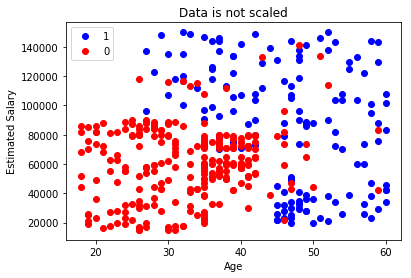

In [3]:
# Visualising the data
# 1: user bought the SUV ad posted on social network
# 0: user bought the SUV ad posted on social network
x1,x2 = X[:,0].reshape(-1,1),X[:,1].reshape(-1,1)
plt.plot(x1[y==1],x2[y==1],'bo',label=1)
plt.plot(x1[y==0],x2[y==0],'ro',label=0)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Data is not scaled')
plt.show()

We will be using Guassian radial basis function kernel to classify our data, since data is non linear. And gamma parameter in the defines width of gaussian field.

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',gamma=1,random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)

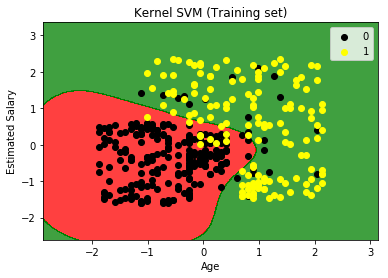

In [5]:
# Visualising the results with contour plots
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'yellow'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The above plot is for the training dataset, we can see the contour plot, red encloses the class which didn't buy SUV whereas remaining of the plot defines or includes class which purchased the SUV.<br>
The above classification method can be tuned with parameters like gamma for <b>rbf</b> kernel, similarly degree for <b>poly</b> kernel. SVMs are robust methods because they define maximum margin between the classes.<br>


#### Further Reading:
1.http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf <br>
2.https://www.dezyre.com/data-science-in-r-programming-tutorial/support-vector-machine-tutorial<br>
3.https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html